In [1]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

# Some common distributions

## The Bernoulli distribution

The Bernoulli distribution arises as the result of a binary outcome, such as a coin flip. Thus, Bernoulli random variables take (only) the values 1 and 0 with probabilities of (say) $p$ and $1 − p$, respectively. Recall that the PMF for a Bernoulli random variable $X$ is $P(X = x) = p^{x}(1 − p)^{1−x}$. 

The mean of a Bernoulli random variable is $p$ and the variance is $p(1−p)$. If we let $X$ be a Bernoulli random variable, it is typical to call $X = 1$ as a "success" and X = 0 as a "failure".

If a random variable follows a Bernoulli distribution with success probability $p$ we write that $X ∼ \text{Bernoulli}(p)$.

Bernoulli random variables are commonly used for modeling any binary trait for a random sample. So, for example, in a random sample whether or not a participant has high blood pressure would be reasonably modeled as Bernoulli.

## Binomial trials

The ***binomial random variables*** are obtained as the sum of iid Bernoulli trials. So if a Bernoulli trial is the result of a coin flip, a binomial random variable is the total number of heads.

To write it out as mathematics, let $X_{1}, \ldots , X_{n}$ be iid Bernoulli($p$), then $X = \sum_{i=1}^n \cdot X_{i}$ is a binomial random variable. We write out that $X ∼ \text{Binomial}(n, p)$. The binomial mass function is

$$
P(X=x) = \binom{n}{x} p^{x}(1-p)^{n-x}
$$

where $x=0, \ldots , n$. Recall that the notion

$$
\binom{n}{x} = \frac{n!}{x!(x-x)!}
$$

(read "n choose x") counts the number of ways of selecting $x$ items out of $n$ without replacement disregarding the order of the items. It turns out that $n$ choose 0 is 1 and $n$ choose 1 and $n$ choose $n − 1$ are both $n$.

### Example

Suppose a friend has 8 children, 7 of which are girls and none are twins. If each gender has an independent 50% probability for each birth, what’s the probability of getting 7 or more girls out of 8 births?

$$
\binom{8}{7} \cdot 0.5^{7} \cdot (1-0.5)^{1} + \binom{8}{8} \cdot 0.5^{8} \cdot (1-0.5)^{0} \approx 0.04
$$

In [2]:
# Simulating means of coin flips
import scipy.special

scipy.special.binom(8, 7)*0.5**8 + scipy.special.binom(8, 8)*0.5**8 

0.03515625

## The normal distribution

The normal distribution is easily the handiest distribution in all of statistics. It can be used in an endless variety of settings. Moreover, as we’ll see later on in the course, sample means follow normal distributions for large sample sizes. 

Remember the goal of probability modeling. We are assuming a probability distribution for our population as a way of parsimoniously characterizing it. In fact, the normal distribution only requires two numbers to characterize it. Specifically, a random variable is said to follow a normal or Gaussian distribution with mean $\mu$ and variance $\sigma^{2}$ if the associated density is:

$$
f(x) = \frac{2}{\sigma \sqrt{2 \pi}} e^{-\frac{1}{2}\big(\frac{x-\mu}{\sigma}\big)^{2}}
$$

If $X$ is a random variable with this density, then $E[X] = \mu$ and $Var(X) = \sigma^{2}$. That is, the normal distribution is characterized by the mean and variance. We write $X ∼ \mathcal{N}(\mu, \sigma^{2})$ to denote a normal random variable. When $\mu = 0$ and $\sigma = 1$ the resulting distribution is called the ***standard normal distribution***. Standard normal random variables are often labeled $Z$.

Consider an example, if we say that intelligence quotients are normally distributed with a mean of 100 and a standard deviation of 15. Then, we are saying that if we randomly sample a person from this population, the probability that they have an IQ of say 120 or larger, is governed by a normal distribution with a mean of 100 and a variance of 152. Taken another way, if we know that the population is normally distributed then to estimate everything about the population, we need only estimate the population mean and variance. (Estimated by the sample mean and the sample variance.)

### Reference quantiles for the standard normal

The normal distribution is so important that it is useful to memorize reference probabilities and quantiles. The image below shows reference lines at 0, 1, 2 and 3 standard deviations above and below 0. This is for the standard normal; however, all of the rules apply to non standard normals as 0, 1, 2 and 3 standard deviations above and below $\mu$, the population mean.

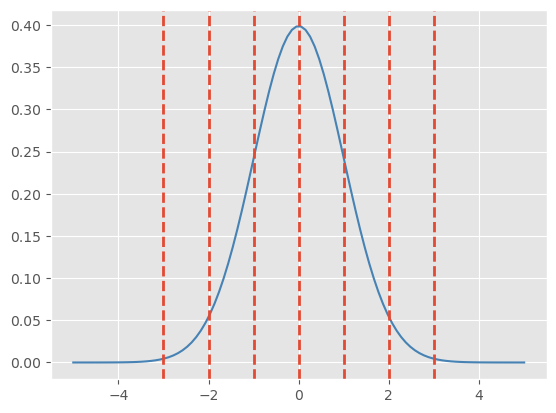

In [3]:
from scipy.stats import norm

x_pdf = np.linspace(-5, 5, 100)
y_pdf = norm.pdf(x_pdf)

sns.lineplot(
    x = x_pdf,
    y = y_pdf,
    color = 'steelblue'
);

plt.axvline(x= 0, lw = 2, linestyle = '--')
plt.axvline(x= 1, lw = 2, linestyle = '--')
plt.axvline(x= -1, lw = 2, linestyle = '--')
plt.axvline(x= 2, lw = 2, linestyle = '--')
plt.axvline(x= -2, lw = 2, linestyle = '--')
plt.axvline(x= 3, lw = 2, linestyle = '--')
plt.axvline(x= -3, lw = 2, linestyle = '--')

The most relevant probabilities are:

1. Approximately $68\%$, $95\%$, $98\%$ of the normal density lies within 1, 2 and 3 standard deviation from the mean, respectively.
2. $-1.28$, $-1.645$, $-1.96$ and $-2.33$ are the $10^{th}$, $5^{th}$, $2.5^{th}$ and $1^{st}$ percentiles of the standard normal distribution, respectively.
3. By symmetry, $1.28$, $1.645$, $1.96$ and $2.33$ are the $90^{th}$, $95^{th}$, $97.5^{th}$ and $99^{th}$ percentiles of the standard normal distribution, respectively.

### Shifting and scaling normals

Since the normal distribution is characterized by only the mean and variance, which are a shift and a scale, we can transform normal random variables to be standard normals and vice versa. For example if $X \sim \mathcal{N}(\mu, \sigma^{2})$ then:

$$
Z = \frac{X-\mu}{\sigma} \sim \mathcal{N}(0,1)
$$

If $Z$ is a standard normal

$$
X = \mu + \sigma Z \sim \mathcal{N}(\mu, \sigma^{2})
$$

then $X$ is $X \sim \mathcal{N}(\mu, \sigma^{2})$. We can use these facts to answer questions about non-standard normals by relating them back to the standard normal.

### Example

What is the $95^{th}$ percentile of a $\mathcal{N}(\mu, \sigma{2})$ distribution? Quick answer in python `norm.ppf(q = .95, loc = mu, scale = sigma)`. Alternatively, because we have the standard normal quantiles memorized, and we know that $1.645$ is its $95^{th}$ percentile, the answer has to be $\mu + \sigma 1.645$. In general, $\mu + \sigma z_{0}$ where $z_{0}$ is the appropriate standard normal quantile. To put some context on our previous setting, population mean BMI for men is reported as $29$ kg/mg$^{2}$ with a standard deviation of $4.73$. Assuming normality of BMI, what is the population $95^{th}$ percentile? The answer is then:

$$
29 + 4.73 \times 1.645 = 36.78
$$

Or alternatively, we could simply type `norm.ppf(q = .95, loc = 29, scale = 4.73)` in Python.

In [4]:
from scipy.stats import norm

norm.ppf(
    q = .95,
    loc = 29,
    scale = 4.73
)

36.780157655480465

Now let’s reverse the process. Imaging asking what’s the probability that a randomly drawn subject from this population has a BMI less than 24.27? Notice that

$$
\frac{24.27-29}{4.73} = -1
$$

Therefore, $24.27$ is $1$ standard deviation below the mean. We know that $16 \%$ lies below or above $1$ standard deviation from the mean. Thus $16 \%$ lies below. Alternatively, `norm.cdf(24.27, 29, 4.73)`
yields the result.

### Example

Assume that the number of daily ad clicks for a company is (approximately) normally distributed with a mean of $1020$ and a standard deviation of $50$. What’s the probability of getting more than $1,160$ clicks in a day? Notice that:

$$
\frac{1160-1020}{50} = 2.8
$$

Therefore, $1,160$ is $2.8$ standard deviations above the mean. We know from our standard normal quantiles that the probability of being larger than 2 standard deviation is $2.5 \%$ and $3$ standard deviations is far in the tail. Therefore, we know that the probability has to be smaller than $2.5 \%$ and should be very small. We can obtain it exactly as Python 1-`norm.cdf(x = 1160, loc = 1020, scale = 50)` which is $0.3 \%$.

### Example

Consider the previous example again. What number of daily ad clicks would represent the one where $75 \%$ of days have fewer clicks (assuming days are independent and identically distributed)? We can obtain this as:

In [5]:
# Finding the normal quantile

n_clicks = norm.ppf(
    q = 0.75,
    loc = 1020,
    scale = 50
)

np.round(n_clicks, 0)

1054.0

## The Poisson Distribution

The Poisson distribution is used to model counts. It is perhaps only second to the normal distribution usefulness. In fact, the Bernoulli, binomial and multinomial distributions can all be modeled by clever uses of the Poisson.

The Poisson distribution is especially useful for modeling unbounded counts or counts per unit of time (rates). Like the number of clicks on advertisements, or the number of people who show up at a bus stop. (While these are in principle bounded, it would be hard to actually put an upper limit on it.) There is also a deep connection between the Poisson distribution and popular models for so-called event-time data. In addition, the Poisson distribution is the default model for so-called contingency table data, which is simply tabulations of discrete characteristics. Finally, when $n$ is large and $p$ is small, the Poisson is an accurate approximation to the binomial distribution.

The Poisson mass function is:

$$
P(X = x; \lambda) = \frac{\lambda^{x}e^{-\lambda}}{x!}
$$

for $x = 0, 1, \dots$. The mean of the distribution is $\lambda$. The variance of the distribution is also $\lambda$. Notice that $x$ ranges from $0$ to $\infty$. Therefore, the Poisson distribution is especially useful for modeling unbounded counts.

### Rates and Poisson random variables

The Poisson distribution is useful for rates, counts that occur over units of time. Specifically, if $X \sim Poisson(\lambda t)$ where $\lambda = E[X/t]$ is the expected count per unit of time and $t$ is the total monitoring time.

### Example

The number of people that show up at a bus stop is Poisson with a mean of 2.5 per hour. If watching the bus stop for 4 hours, what is the probability that $3$ or fewer people show up for the whole time?

In [6]:
from scipy.stats import poisson

poisson.cdf(k = 3, mu = 2.5*4)

0.010336050675925726

Therefore, there is about a $1 \%$ chance that $3$ or fewer people show up. Notice the multiplication by four in the function argument. Since lambda is specified as events per hour we have to multiply by four to consider the number of events that occur in 4 hours.

### Poisson approximation to the binomial

When $n$ is large and $p$ is small the Poisson distribution is an accurate approximation to the binomial distribution. Formally, if $X \sim Binomial(n, p)$ then $X$ is approximately Poisson where $\lambda = np$ provided that $n$ is large $p$ is small.

#### Example, Poisson approximation to the binomial

We flip a coin with success probability $0.01$ five hundred times. What’s the probability of $2$ or fewer successes?

In [7]:
from scipy.stats import poisson

np.round(poisson.cdf(2, mu = 500*0.01), 5)

0.12465

In [8]:
from scipy.stats import binom

np.round(binom.cdf(2, n = 500, p = 0.01), 5)

0.12339

So we can see that the probabilities agree quite well. This approximation is often done as the Poisson model is a more convenient model in many respects.